In [1]:
import leafmap
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from samgeo import split_raster
from samgeo.text_sam import LangSAM
from utils import plot_overlay

In [2]:
image_name = '32692_5335'
image = f'../data/{image_name}.tif'

# Load image
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (1000, 1000))

In [3]:
def increase_contrast(image, alpha=1.5, beta=0):
    # Apply contrast adjustment using the formula: output = alpha * input + beta
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

def increase_saturation(image, factor=1.5):
    # Convert the image from BGR to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Increase the saturation channel
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * factor, 0, 255).astype(np.uint8)

    # Convert the image back to BGR
    saturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    return saturated_image

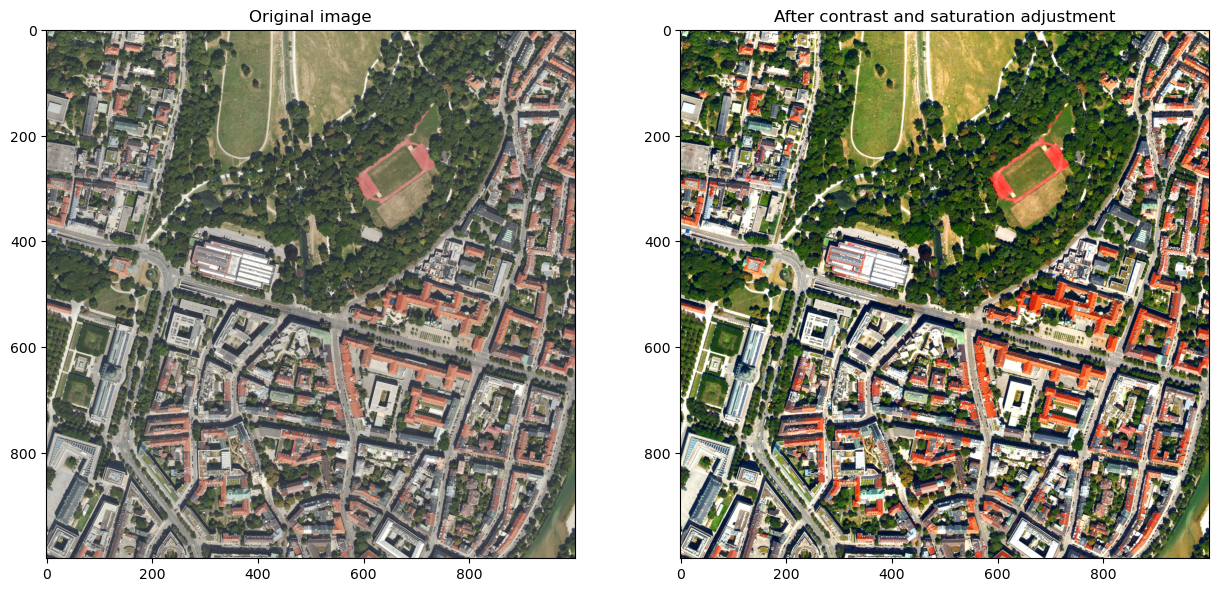

In [4]:
img_changed = increase_contrast(img, alpha=1.5, beta=-50)
img_changed = increase_saturation(img_changed, factor=1.5)


plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(img_changed)
plt.title('After contrast and saturation adjustment')
plt.show()

In [5]:
img_changed = cv2.cvtColor(img_changed, cv2.COLOR_RGB2BGR)
cv2.imwrite('tmp/image.png', img_changed)

image = 'tmp/image.png'

In [6]:
%env CUDA_VISIBLE_DEVICES="" # to run on CPU

env: CUDA_VISIBLE_DEVICES="" # to run on CPU


In [7]:
SAM_CHECKPOINT = "../segment-anything/checkpoints/sam_vit_l_0b3195.pth"
MODEL_TYPE = "vit_l"
sam = LangSAM(model_type=MODEL_TYPE, checkpoint=SAM_CHECKPOINT)

final text_encoder_type: bert-base-uncased


In [24]:
text_prompt = "tree, gras"
mask_path = f'tmp/image_mask.tif'
box_threshold = 0.25
text_threshold = 0.5
sam.predict(image, text_prompt, 
            box_threshold=box_threshold, 
            text_threshold=text_threshold, 
            output=mask_path
            )

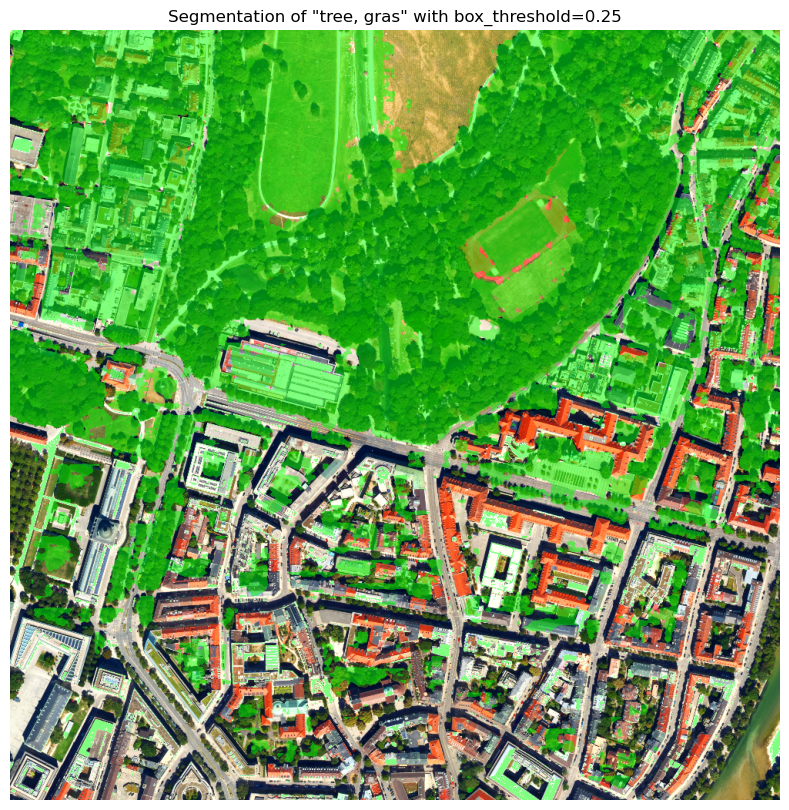

In [25]:
output_path = f'tmp/image_overlay_{box_threshold}_{text_threshold}.png'
title = f'Segmentation of "{text_prompt}" with box_threshold={box_threshold}'
plot_overlay(image, mask_path,  output=output_path, title=title)